# CAP-DS | Assignment[Ensemble Learning II]

# Task1: Data Exploration and Preprocessing

* Load the dataset and perform basic data exploration to understand the features and target variable.

* Preprocess the data as necessary, including handling missing values, encoding categorical variables, and normalizing or standardizing the features.

In [1]:
#importing important libraries, reading dataset and analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
#Getting the shape
df.shape

(920, 16)

In [3]:
#Getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
#Checking on null values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [5]:
#Getting the duplicates
df.duplicated().sum()

0

In [6]:
#Getting the EDA before preprocess
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


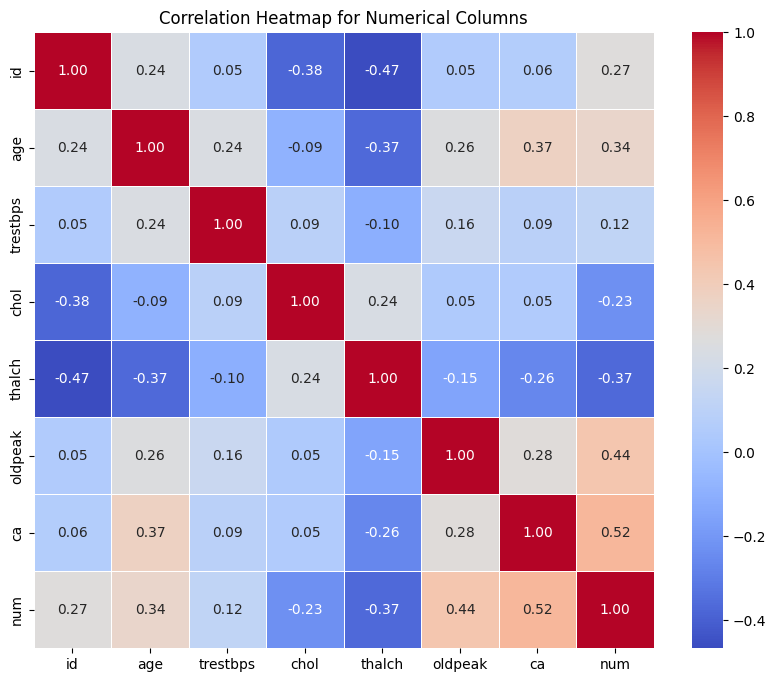

In [8]:
#Getting the correlation with heatmap only for numerical columns
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['number'])  #Select only numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

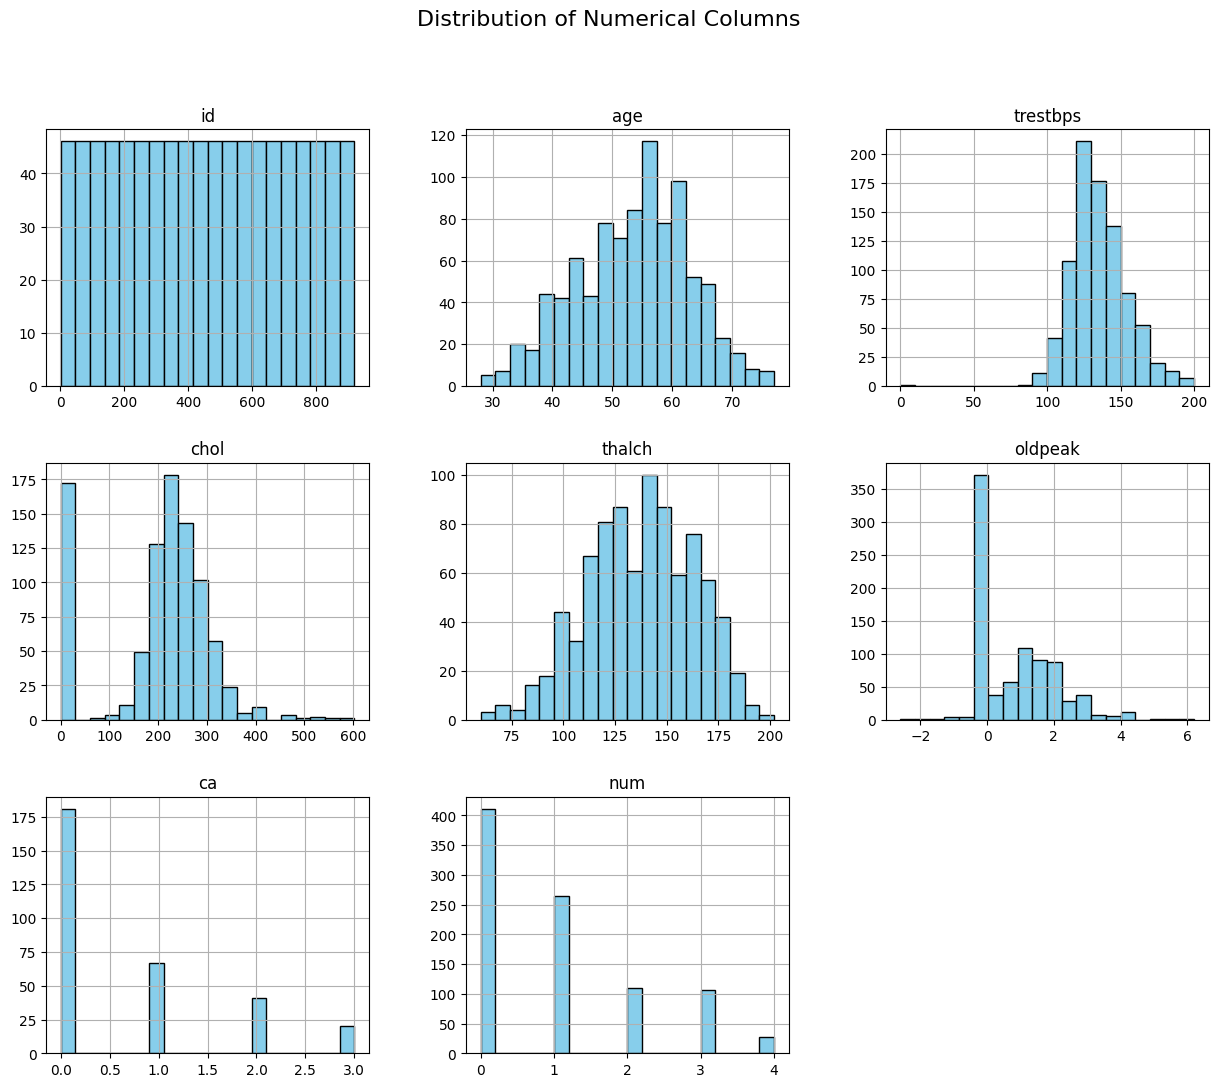

In [9]:
numerical_df = df.select_dtypes(include=['number'])

# Plot histogram for each numerical column
numerical_df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()

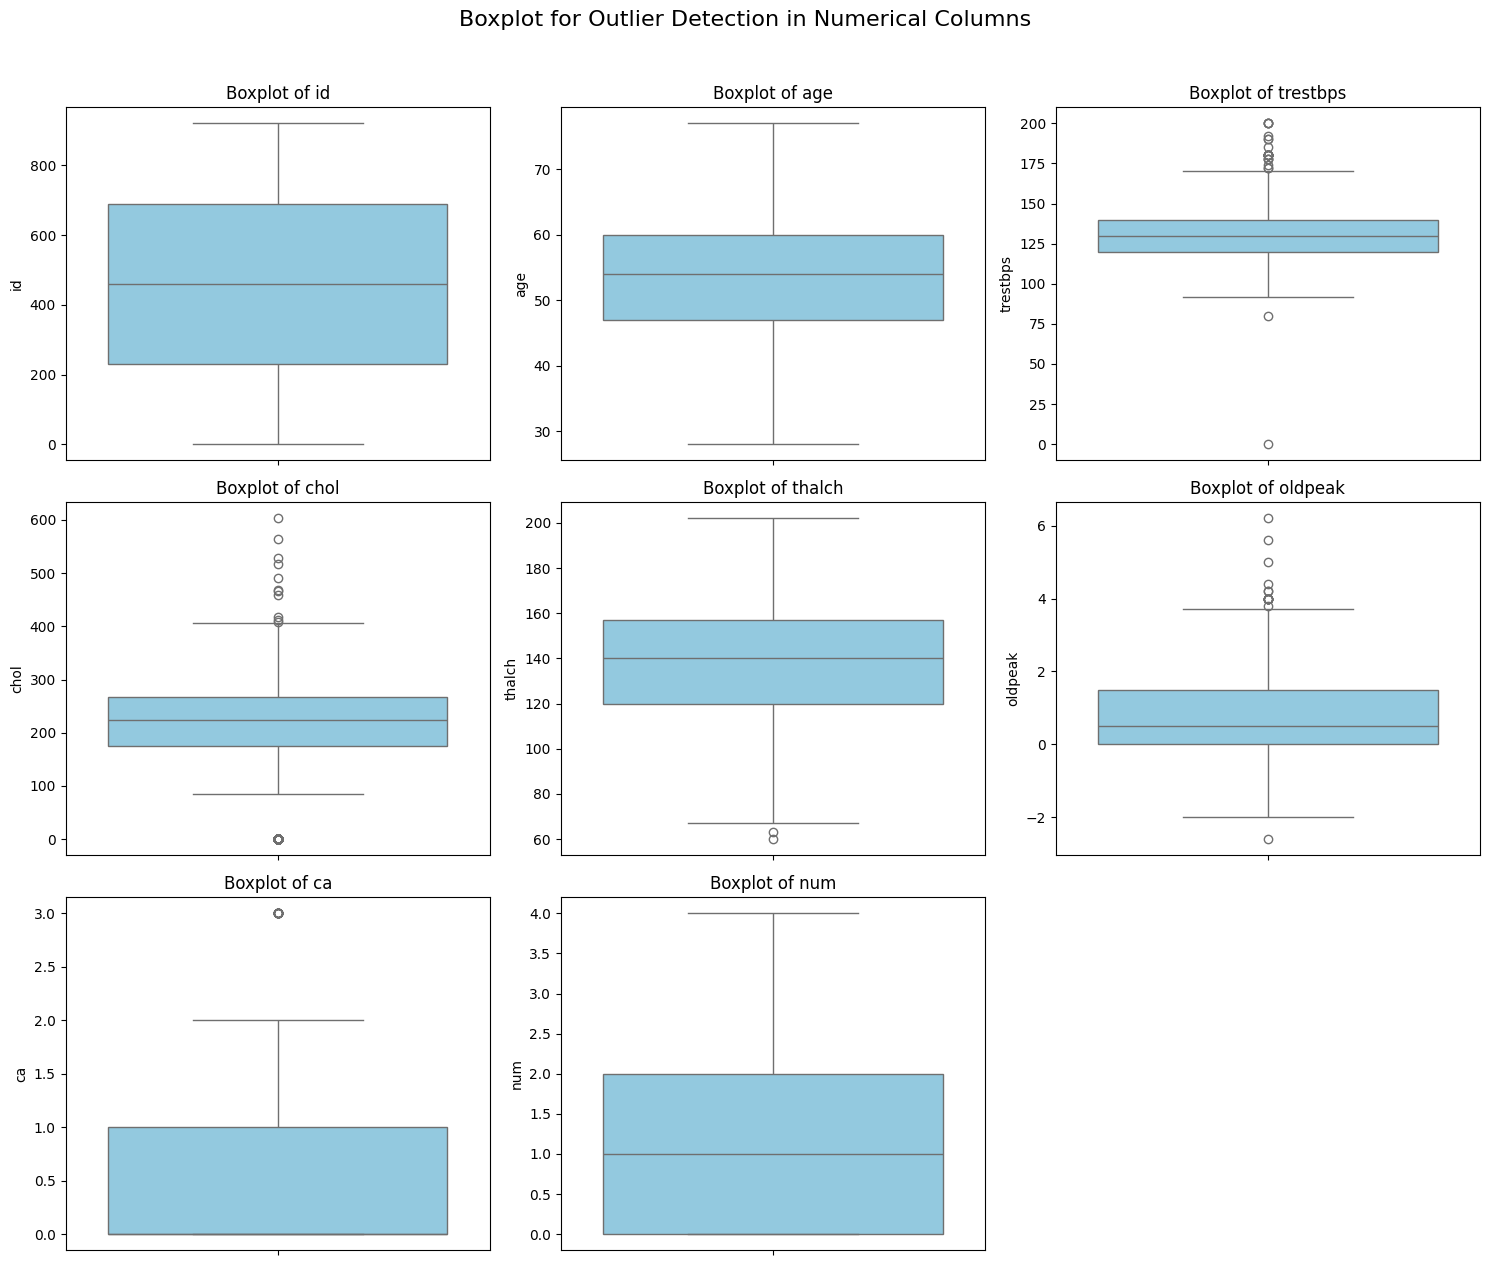

In [10]:
numerical_df = df.select_dtypes(include=['number'])

# Plot boxplot for each numerical column
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(3, 3, i)  # Adjusting to fit within a 3x3 grid
    sns.boxplot(y=numerical_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.suptitle("Boxplot for Outlier Detection in Numerical Columns", fontsize=16, y=1.05)
plt.show()

In [11]:
#making the copy of original dataset
df1=df.copy()

In [12]:
#Iniatializing Preprocess
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#median imputation on trestbps
df1['trestbps']=df1['trestbps'].fillna(df1['trestbps'].median())
#median imputation on chol
df1['chol']=df1['chol'].fillna(df1['chol'].median())

#mean imputation on Thalach column
df1['thalch']=df1['thalch'].fillna(df1['thalch'].mean())

#mean imputation on oldpeak column
df1['oldpeak']=df1['oldpeak'].fillna(df1['oldpeak'].median())

#mode imputation on ca column
df1['ca']=df1['ca'].fillna(df1['ca'].mode()[0])

In [13]:
df1['fbs']=df1['fbs'].fillna(df1['fbs'].mode()[0])
df1['restecg']=df1['restecg'].fillna(df1['restecg'].mode()[0])
df1['exang']=df1['exang'].fillna(df1['exang'].mode()[0])
df1['slope']=df1['slope'].fillna(df1['slope'].mode()[0])
df1['thal']=df1['thal'].fillna(df1['thal'].mode()[0])

In [14]:
df1.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [15]:
#apply mapping to sex, fbs, exang columns
df1['sex']=df1['sex'].map({'Female':0,'Male':1})
#df1['fbs']=df1['fbs'].map({'False':0,'True':1})
#df1['exang']=df1['exang'].map({'False':0,'True':1})

In [17]:
df1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,1,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,1,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,1,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,0,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


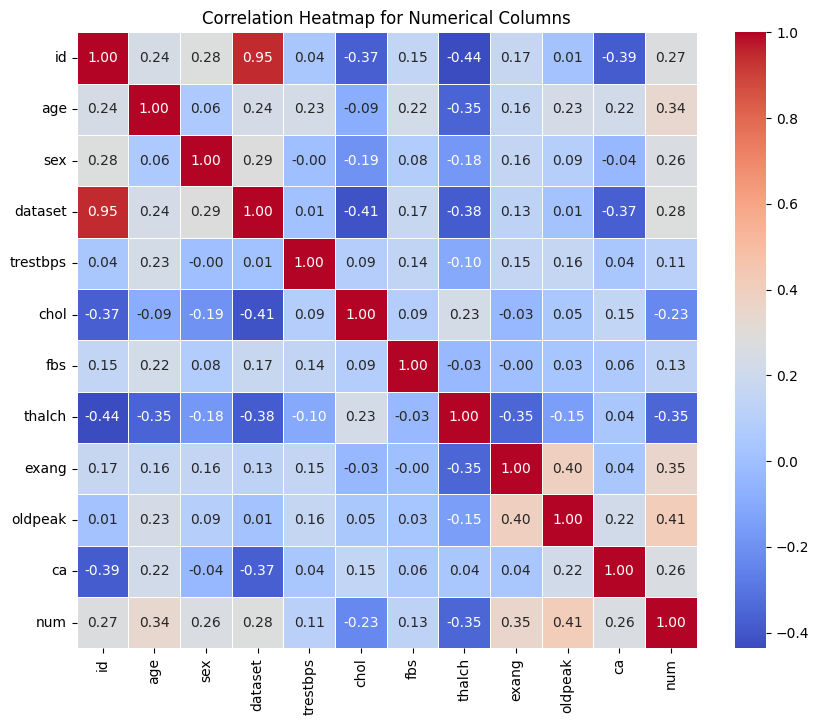

In [23]:
#correlation for df1 numerical columns
numerical_df = df1.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define numerical and categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['fbs', 'exang', 'dataset', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df1[numerical_cols] = imputer.fit_transform(df1[numerical_cols])

# Scale numerical features
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Split the data into features (X) and target (y)
X = df1.drop(columns=['num'])
y = df1['num']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now the dataset is ready for model training


   id  age  sex  trestbps   chol  thalch  oldpeak   ca  num   cp_1  ...  \
0   1   63    1     145.0  233.0   150.0      2.3  0.0    0  False  ...   
1   2   67    1     160.0  286.0   108.0      1.5  3.0    2  False  ...   
2   3   67    1     120.0  229.0   129.0      2.6  2.0    1  False  ...   
3   4   37    1     130.0  250.0   187.0      3.5  0.0    0  False  ...   
4   5   41    0     130.0  204.0   172.0      1.4  0.0    0   True  ...   

   restecg_1  restecg_2  exang_1  dataset_1  dataset_2  dataset_3  slope_1  \
0      False      False    False      False      False      False    False   
1      False      False     True      False      False      False     True   
2      False      False     True      False      False      False     True   
3       True      False    False      False      False      False    False   
4      False      False    False      False      False      False    False   

   slope_2  thal_1  thal_2  
0    False   False   False  
1    False    True   F

#Feature Engineering

In [24]:
import pandas as pd
import numpy as np

# Drop the 'id' column
df1 = df1.drop(columns=['id'])

#Create interaction feature
df1['oldpeak_exang'] = df1['oldpeak'] * df1['exang']

#Discretize 'age' into bins
df1['age_group'] = pd.cut(df1['age'], bins=[0, 40, 50, 60, 70, 80], labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Convert categorical features into dummy variables (one-hot encoding)
df1 = pd.get_dummies(df1, columns=['age_group', 'dataset'], drop_first=True)

df1.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,thal_1,thal_2,oldpeak_exang,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,dataset_1,dataset_2,dataset_3
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,False,False,0.0,False,False,True,False,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,True,False,1.5,False,False,True,False,False,False,False
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,False,True,2.6,False,False,True,False,False,False,False
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,True,False,0.0,False,False,False,False,False,False,False
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,True,False,0.0,True,False,False,False,False,False,False


#Model comparison for better understand

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#features and target
X = df1.drop(columns=['num'])
y = df1['num']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the continuous features
scaler = StandardScaler()
X_train[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']] = scaler.fit_transform(X_train[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']])
X_test[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']] = scaler.transform(X_test[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#features and target
X = df1.drop(columns=['num'])
y = df1['num']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the continuous features
scaler = StandardScaler()
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

#Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate across all models
for name, model in models.items():

    model.fit(X_train, y_train)

    #predictions
    y_pred = model.predict(X_test)

    #model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.5598
K-Nearest Neighbors Accuracy: 0.5326
Support Vector Classifier Accuracy: 0.5326
Decision Tree Accuracy: 0.5217
Random Forest Accuracy: 0.5870
XGBoost Accuracy: 0.5924


# Task2: Model Building with XGBoost

* Split the data into training and testing sets.

* Train an initial XGBoost model using the default parameters to predict the presence of heart disease.

* Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

#Features and target
X = df1.drop(columns=['num'])
y = df1['num']

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the continuous features
scaler = StandardScaler()
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

#Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

#Predictions
y_pred = xgb_model.predict(X_test)

#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print("\nClassification Report:")

unique_classes = sorted(y.unique())
target_names = [f'Class {cls}' for cls in unique_classes]
print(classification_report(y_test, y_pred, target_names=target_names))
#print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

XGBoost Accuracy: 0.5924

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.89      0.78        75
     Class 1       0.59      0.50      0.54        54
     Class 2       0.55      0.24      0.33        25
     Class 3       0.33      0.35      0.34        26
     Class 4       0.00      0.00      0.00         4

    accuracy                           0.59       184
   macro avg       0.43      0.40      0.40       184
weighted avg       0.58      0.59      0.57       184



# Task3: Model Optimization

* Perform hyperparameter tuning on the XGBoost model to find the optimal settings Consider tuning parameters such as learning_rate, max_depth n_estimators, subsample, and colsample_bytree

* Compare the performance of the tuned model against the initial model. Discuss the changes in performance metrics.

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Features and target
X = df1.drop(columns=['num'])
y = df1['num']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the continuous features
scaler = StandardScaler()
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'oldpeak_exang']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_xgb_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best Cross-Validation Score: 0.6046

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.61      0.92      0.73        75
     Class 1       0.47      0.50      0.49        54
     Class 2       0.40      0.08      0.13        25
     Class 3       0.22      0.08      0.11        26
     Class 4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.34      0.32      0.29       184
weighted avg       0.47      0.54      0.48       184



* Overall Accuracy: The accuracy of 54% is lower than expected, suggesting that despite the tuning, the model struggles with certain classes.


#Task4: Feature Importance Analysis

* Use the XGBoost model to assess the importance of each feature in predicting heart disease.

* Visualize the feature importances and discuss which features are most influential in predicting the presence of heart disease.

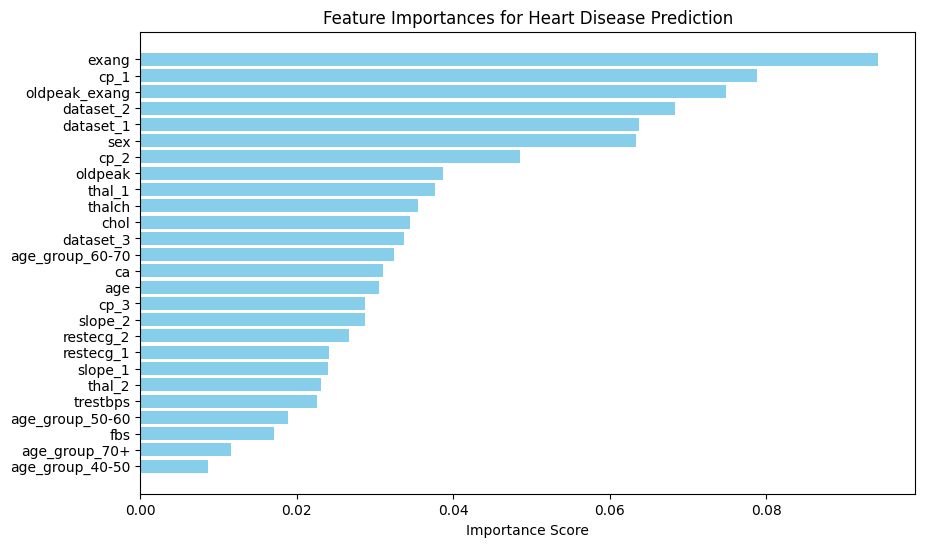

            Feature  Importance
6             exang    0.094306
9              cp_1    0.078859
18    oldpeak_exang    0.074826
24        dataset_2    0.068371
23        dataset_1    0.063757
1               sex    0.063321
10             cp_2    0.048514
7           oldpeak    0.038675
16           thal_1    0.037615
5            thalch    0.035465
3              chol    0.034428
25        dataset_3    0.033750
21  age_group_60-70    0.032379
8                ca    0.031010
0               age    0.030565
11             cp_3    0.028689
15          slope_2    0.028678
13        restecg_2    0.026702
12        restecg_1    0.024135
14          slope_1    0.024049
17           thal_2    0.023141
2          trestbps    0.022622
20  age_group_50-60    0.018819
4               fbs    0.017116
22    age_group_70+    0.011560
19  age_group_40-50    0.008648


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the best XGBoost model
best_xgb_model.fit(X_train, y_train)

#Get feature importances
importances = best_xgb_model.feature_importances_

#Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances for Heart Disease Prediction')
plt.gca().invert_yaxis()
plt.show()

#Display the importance DataFrame
print(importance_df)

**Interpretation of Importance Scores**
* The significance scores provide information about the relative contributions of each feature to the model's decision-making process. Stronger influence is indicated by higher ratings, which might direct future research or clinical attention.
* Low-importance features may point to places where feature engineering or data collecting should be strengthened.

#Task5: Conclusion

* Summarize the findings of the assignment. Discuss the effectiveness of XGBoost in this predictive task and any insights gained from the feature importance analysis.